## HARIHARASUDHAN D
## Empowering Financial Security: Detecting Fraudulent Transactions using Advanced Machine Learning Techniques and Predictive Analytics
### Import Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [40]:
### Dataset Loading

In [41]:
Trans_df = pd.read_csv("Payment_Data.csv")

In [42]:
Trans_df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [43]:
Trans_df.tail()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
39216,986,1,4.836982,creditcard,0.000000,shopping,0.0,0
39217,1647,1,4.876771,creditcard,377.930556,shopping,0.0,0
39218,1591,1,4.742303,creditcard,0.000000,shopping,1.0,0
39219,237,1,4.921318,creditcard,236.082639,shopping,1.0,0
39220,272,1,5.040929,paypal,0.000694,shopping,0.0,0


In [44]:
Trans_df.shape

(39221, 8)

In [45]:
print(f'number of rows : {Trans_df.shape[0]}  \nnumber of columns : {Trans_df.shape[1]}')

number of rows : 39221  
number of columns : 8


In [46]:
Trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [47]:

value = len(Trans_df[Trans_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  3033


In [48]:
Trans_df = Trans_df.drop_duplicates()
Trans_df.head(5)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [49]:
Trans_df.shape

(36188, 8)

In [50]:
print(Trans_df.isnull().sum())

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               396
label                     0
dtype: int64


In [51]:
Trans_df=Trans_df.dropna() #Dropping the missing Values

In [52]:
Trans_df.count()

accountAgeDays          35705
numItems                35705
localTime               35705
paymentMethod           35705
paymentMethodAgeDays    35705
Category                35705
isWeekend               35705
label                   35705
dtype: int64

In [53]:
print(Trans_df.isnull().sum()) #finding and check the missing values in the dataset

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64


In [54]:
Trans_df_filled = Trans_df.fillna(method='ffill')
print(Trans_df_filled) #fill na method used for fills the NaN values with the last known non-NaN value.

       accountAgeDays  numItems  localTime paymentMethod  \
0                  29         1   4.745402        paypal   
1                 725         1   4.742303   storecredit   
2                 845         1   4.921318    creditcard   
3                 503         1   4.886641    creditcard   
4                2000         1   5.040929    creditcard   
...               ...       ...        ...           ...   
39216             986         1   4.836982    creditcard   
39217            1647         1   4.876771    creditcard   
39218            1591         1   4.742303    creditcard   
39219             237         1   4.921318    creditcard   
39220             272         1   5.040929        paypal   

       paymentMethodAgeDays     Category  isWeekend  label  
0                 28.204861     shopping        0.0      0  
1                  0.000000  electronics        0.0      0  
2                  0.000000         food        1.0      0  
3                  0.000000  electr

## EDA

In [55]:
numeric_features = []
categorical_features = []

for col in Trans_df.columns:
  if Trans_df[col].nunique() > 10:
    numeric_features.append(col)
  else:
    categorical_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays']
category feature : ['paymentMethod', 'Category', 'isWeekend', 'label']


In [56]:
print("\nDistribution of Categorical Features:")
for column in Trans_df.select_dtypes(include='object'):
    print(f"\n{column}:\n{Trans_df[column].value_counts()}")


Distribution of Categorical Features:

paymentMethod:
paymentMethod
creditcard     25216
paypal          8639
storecredit     1850
Name: count, dtype: int64

Category:
Category
shopping       12205
food           11818
electronics    11682
Name: count, dtype: int64


In [57]:
# Print the column names to check for 'LocalTime'
print("Columns in the DataFrame:")
print(Trans_df.columns)

Columns in the DataFrame:
Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'Category', 'isWeekend', 'label'],
      dtype='object')


In [58]:
# Check for 'LocalTime' column or similar variations
columns_lower = [col.lower() for col in Trans_df.columns]
if 'localtime' in columns_lower:
    local_time_col = Trans_df.columns[columns_lower.index('localtime')]
elif 'local_time' in columns_lower:
    local_time_col = Trans_df.columns[columns_lower.index('local_time')]
elif 'local time' in columns_lower:
    local_time_col = Trans_df.columns[columns_lower.index('local time')]
else:
    raise KeyError("The 'LocalTime' column is not found in the DataFrame.")

# Convert LocalTime to a more readable format
def convert_local_time(time_float):
    hours = int(time_float)
    minutes = int((time_float - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

Trans_df['LocalTimeFormatted'] = Trans_df[local_time_col].apply(convert_local_time)

In [59]:
# Display first few rows to check the conversion
print(Trans_df[[local_time_col, 'LocalTimeFormatted']].head())

   localTime LocalTimeFormatted
0   4.745402              04:44
1   4.742303              04:44
2   4.921318              04:55
3   4.886641              04:53
4   5.040929              05:02


In [60]:
# Set the figure size
plt.figure(figsize=(14, 12))

<Figure size 1400x1200 with 0 Axes>

<Figure size 1400x1200 with 0 Axes>

In [61]:
# Numeric features
numeric_features = ['accountAgeDays', 'numItems', 'paymentMethodAgeDays']


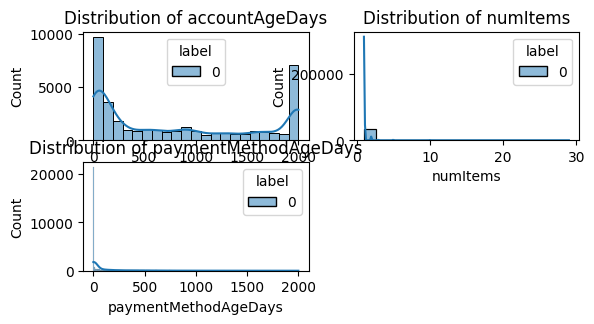

In [62]:
# Distribution plot for numeric features
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=Trans_df, x=feature, kde=True, hue='label')
    plt.title(f'Distribution of {feature}')

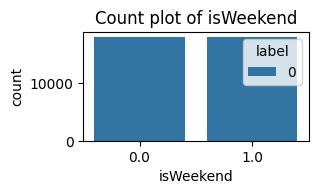

In [63]:
# Check if 'IsWeekend' column exists
if 'isWeekend' in Trans_df.columns:
    # Count plot for IsWeekend
    plt.subplot(3, 2, len(numeric_features)+1)
    sns.countplot(data=Trans_df, x='isWeekend', hue='label')
    plt.title('Count plot of isWeekend')

In [64]:
# Show the plots
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

### Feature Engineering

In [65]:
# One-hot encoding for PaymentMethod and Category
Trans_df = pd.get_dummies(Trans_df, columns=['paymentMethod', 'Category'], prefix=['paymentMethod', 'Category'])

In [66]:
# Let's scale numerical features using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Trans_df[['accountAgeDays', 'numItems', 'localTime']] = scaler.fit_transform(Trans_df[['accountAgeDays', 'numItems', 'localTime']])

In [67]:
# Separate features and target variable
X = Trans_df.drop('label', axis=1)
y = Trans_df['label']


In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
# Let's scale numerical features using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Extract hours and minutes from 'localTime' and convert to numerical values
Trans_df['localTime_hours'] = pd.to_datetime(Trans_df['localTime']).dt.hour
Trans_df['localTime_minutes'] = pd.to_datetime(Trans_df['localTime']).dt.minute

# Combine hours and minutes into a single numerical value (e.g., 4:03 becomes 4.05)
Trans_df['localTime_numeric'] = Trans_df['localTime_hours'] + Trans_df['localTime_minutes'] / 60

# Drop the original 'localTime' column
Trans_df.drop('localTime', axis=1, inplace=True)

# Scale the new 'localTime_numeric' column
Trans_df[['accountAgeDays', 'numItems', 'localTime_numeric']] = scaler.fit_transform(Trans_df[['accountAgeDays', 'numItems', 'localTime_numeric']])

In [70]:
# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: '04:03'

In [71]:
# Let's scale numerical features using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Extract hours and minutes from 'localTime' and convert to numerical values
Trans_df['localTime_hours'] = pd.to_datetime(Trans_df['localTime']).dt.hour  # This line is unchanged
Trans_df['localTime_minutes'] = pd.to_datetime(Trans_df['localTime']).dt.minute # This line is unchanged

# Convert hours and minutes to integers
Trans_df['localTime_hours'] = Trans_df['localTime_hours'].astype(int)
Trans_df['localTime_minutes'] = Trans_df['localTime_minutes'].astype(int)

# Combine hours and minutes into a single numerical value (e.g., 4:03 becomes 4.05)
Trans_df['localTime_numeric'] = Trans_df['localTime_hours'] + Trans_df['localTime_minutes'] / 60

# Drop the original 'localTime' column
Trans_df.drop('localTime', axis=1, inplace=True)

# Scale the new '

KeyError: 'localTime'

In [72]:
# Drop the original 'localTime' column
Trans_df.drop('localTime', axis=1, inplace=True)

KeyError: "['localTime'] not found in axis"